In [1]:
# Step 1: Data Preprocessing and Model Training

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_cat'] = df['target'].astype('category')

In [3]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_cat
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
unique,NaN,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,50.0
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [4]:
df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target                  int64
target_cat           category
dtype: object

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_cat
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int64   
 5   target_cat         150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_cat           0
dtype: int64

In [8]:
# populate the list of numeric attributes and categorical attributes
from pandas.api.types import is_string_dtype, is_numeric_dtype
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
       num_list.append(column)
    elif df[column].dtype == 'category':
       cat_list.append(column)    
print(num_list)
print(cat_list)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
['target_cat']


sepal length (cm) True
sepal width (cm) True
petal length (cm) True
petal width (cm) True
target True


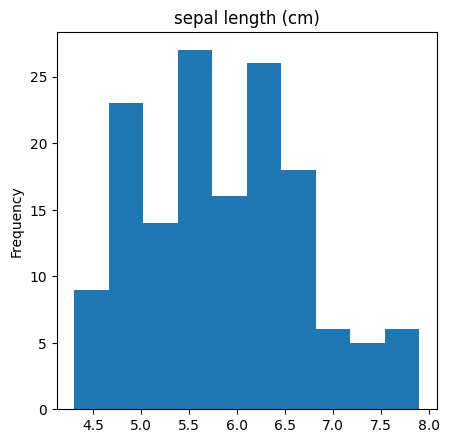

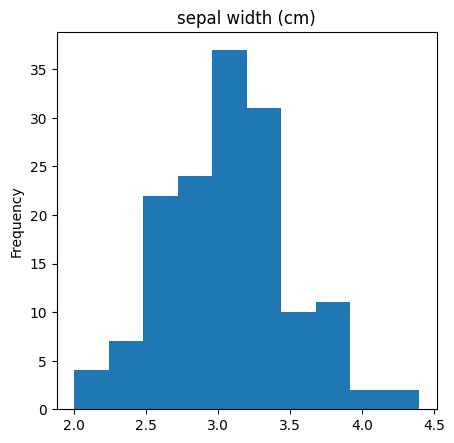

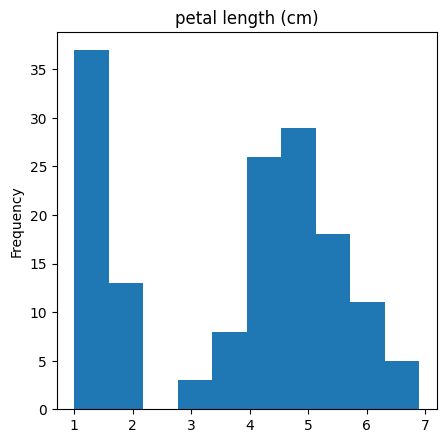

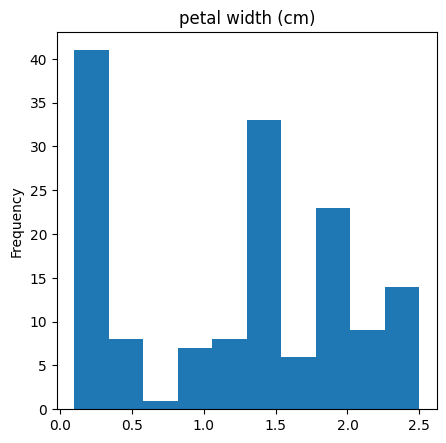

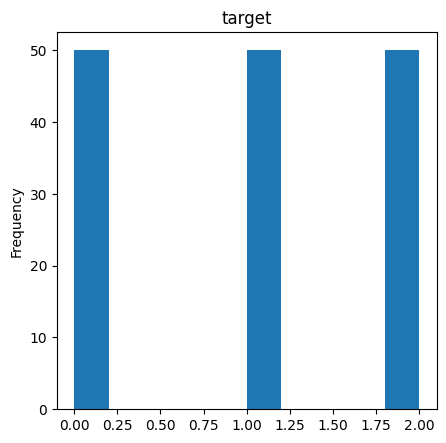

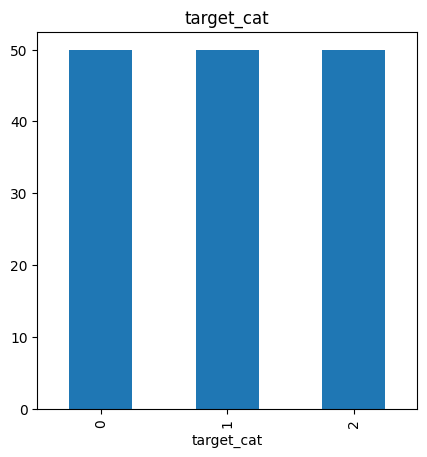

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### 3. Univaraite Analysis ###

# bar chart and histogram
for column in df:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(df[column]):
           print(column,is_numeric_dtype(df[column]))
           df[column].plot(kind = 'hist')
    elif df[column].dtype == 'category':
# show only the TOP 10 value count in each categorical data
       df[column].value_counts()[:10].plot(kind = 'bar')
plt.show()

<Axes: >

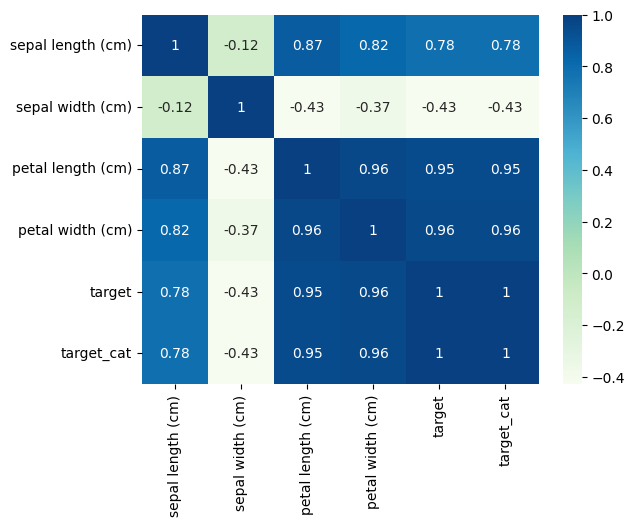

In [10]:
### 4. Multivariate Analysis ###

# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


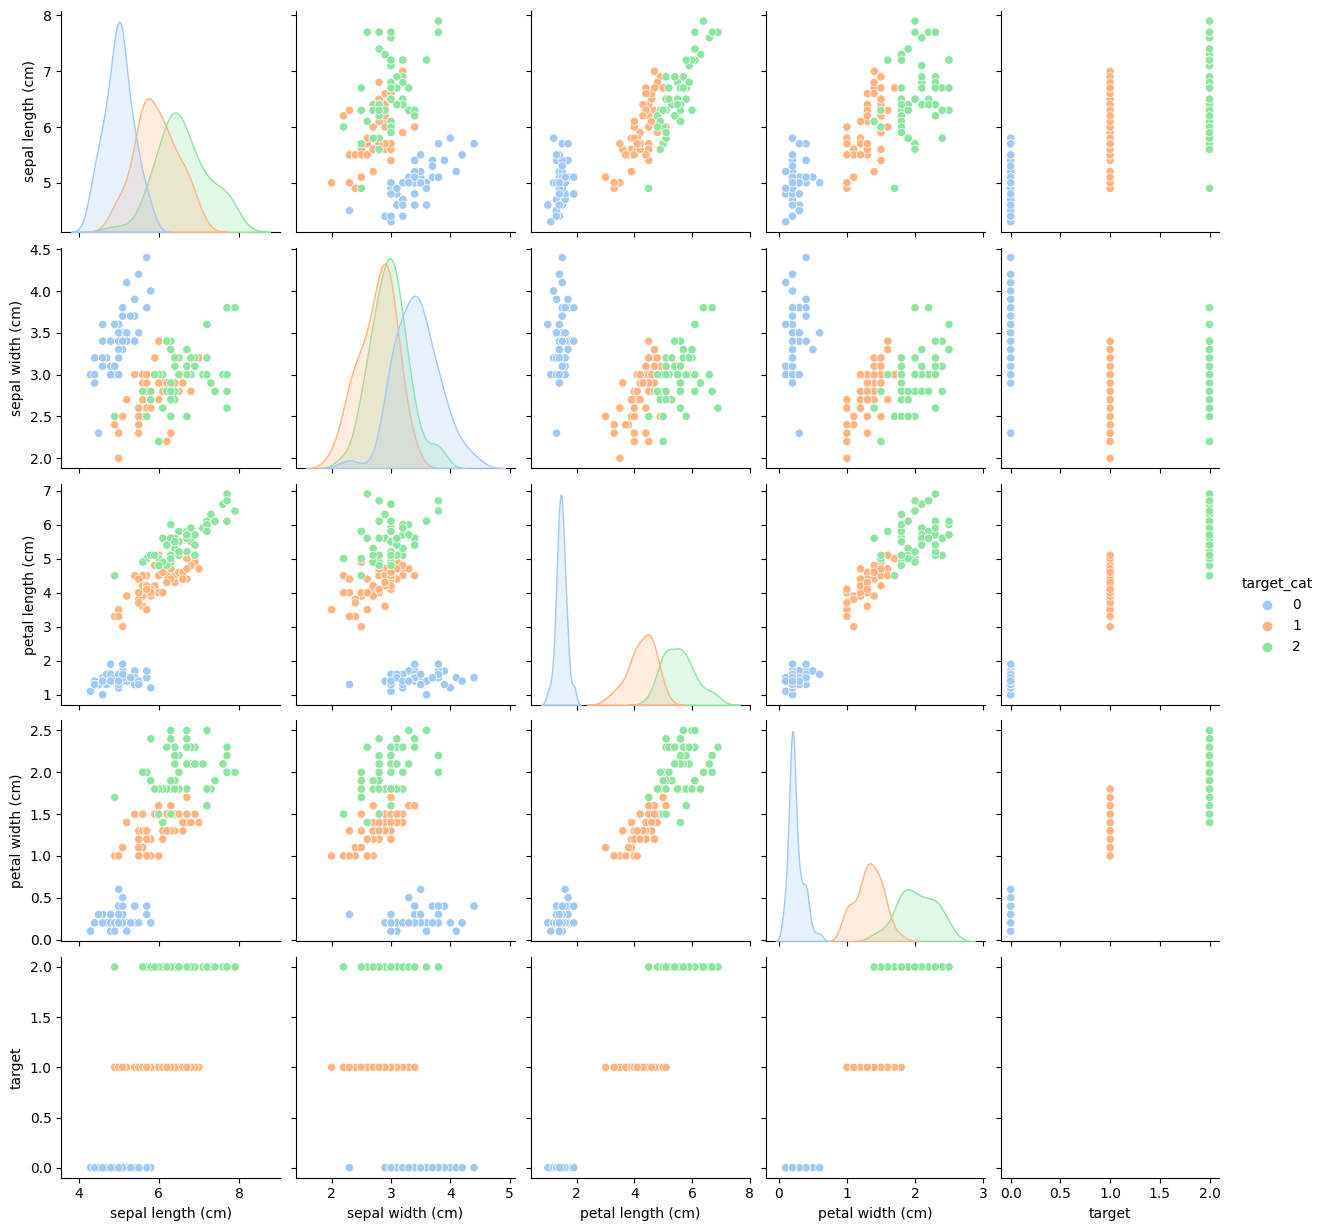

In [11]:
# pairplot
# Set the colormap to "tab10"
sns.set_palette("pastel")

sns.pairplot(df,height = 2.5, hue='target_cat')


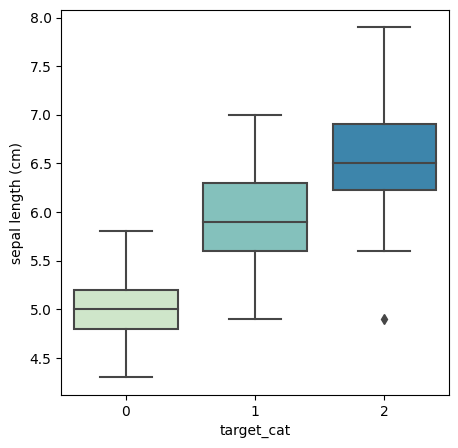

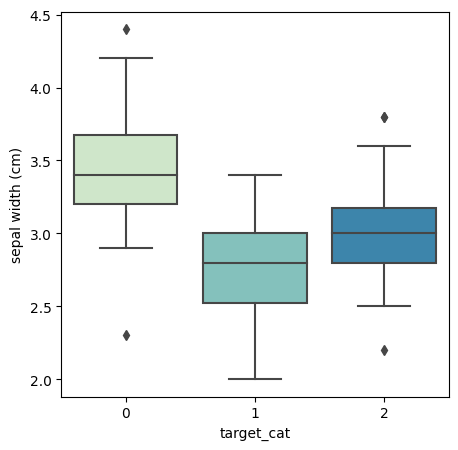

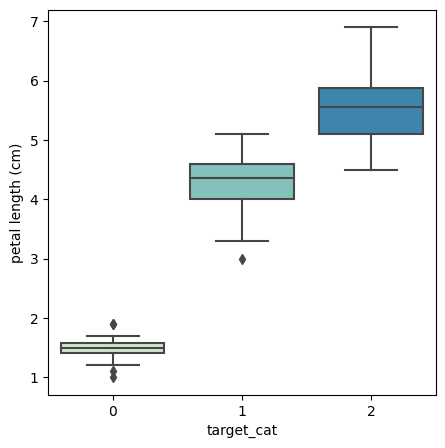

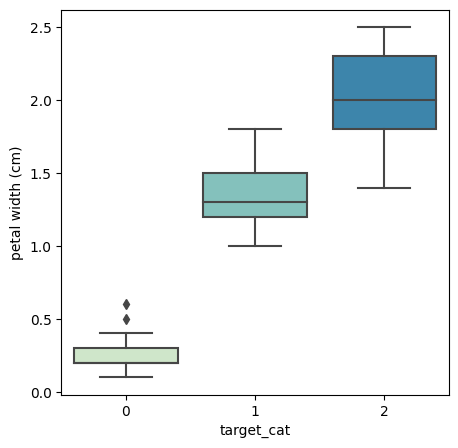

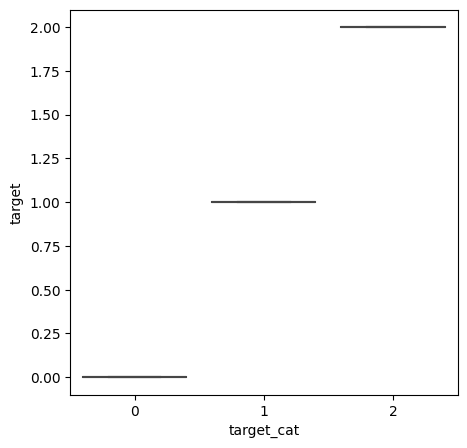

In [13]:
# box plot
# Set the number of rows and columns
num_rows = 1
num_cols = 5


for i in range(0, len(cat_list)):
   cat = cat_list[i]
for j in range(0, len(num_list)):
       num = num_list[j]
       plt.figure (figsize = (5,5))
       sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")